In [187]:
# prepare and wrangle data using pandas and numpy

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:

# import dataset
df = pd.read_csv("data.csv")

print(df.info())
print(df.describe())

df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOCATION     1341 non-null   object 
 1   TIME         1341 non-null   int64  
 2   PC_HEALTHXP  1341 non-null   float64
 3   PC_GDP       1341 non-null   float64
 4   USD_CAP      1341 non-null   float64
 5   TOTAL_SPEND  1341 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 63.0+ KB
None
              TIME  PC_HEALTHXP       PC_GDP      USD_CAP    TOTAL_SPEND
count  1341.000000  1341.000000  1341.000000  1341.000000    1341.000000
mean   2001.134228    16.632877     1.215524   338.278398   14439.322088
std      14.093659     6.613320     0.479568   226.158326   43259.358895
min    1970.000000     5.545000     0.207000     3.628000       5.810000
25%    1990.000000    11.849000     0.802000   144.592000     756.280000
50%    2004.000000    15.238000     1.187000   317.7

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND
0,AUS,1971,15.992,0.726,33.990,439.73
1,AUS,1972,15.091,0.685,34.184,450.44
2,AUS,1973,15.117,0.681,37.956,507.85
3,AUS,1974,14.771,0.754,45.338,622.17
4,AUS,1975,11.849,0.682,44.363,616.34


In [189]:
df.describe()

,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND
count,1341.000000,1341.000000,1341.000000,1341.000000,1341.000000
mean,2001.134228,16.632877,1.215524,338.278398,14439.322088
std,14.093659,6.613320,0.479568,226.158326,43259.358895
min,1970.000000,5.545000,0.207000,3.628000,5.810000
25%,1990.000000,11.849000,0.802000,144.592000,756.280000
50%,2004.000000,15.238000,1.187000,317.795000,2786.190000
75%,2013.000000,20.580000,1.524000,496.858000,8794.360000
max,2022.000000,40.239000,2.870000,1432.309000,475596.740000


In [190]:
l = df["LOCATION"].value_counts()
print(f"{len(l)} countries in dataset\n", l)

44 countries in dataset
 LOCATION
CAN    53
KOR    53
ISL    53
SWE    52
NOR    52
FIN    52
DEU    51
NLD    51
AUS    50
IRL    47
BEL    47
PRT    45
LUX    45
DNK    43
ESP    38
JPN    38
FRA    36
GBR    36
USA    35
ITA    35
GRC    34
CZE    32
AUT    32
HUN    28
NZL    24
MEX    23
EST    23
SVK    23
SVN    20
POL    20
ROU    19
CYP    19
LVA    18
LTU    18
BGR    16
ISR    15
CHE    12
HRV    11
CRI    11
TUR    11
MLT     7
BRA     5
COL     5
CHL     3
Name: count, dtype: int64


<Axes: xlabel='TIME', ylabel='PC_HEALTHXP'>

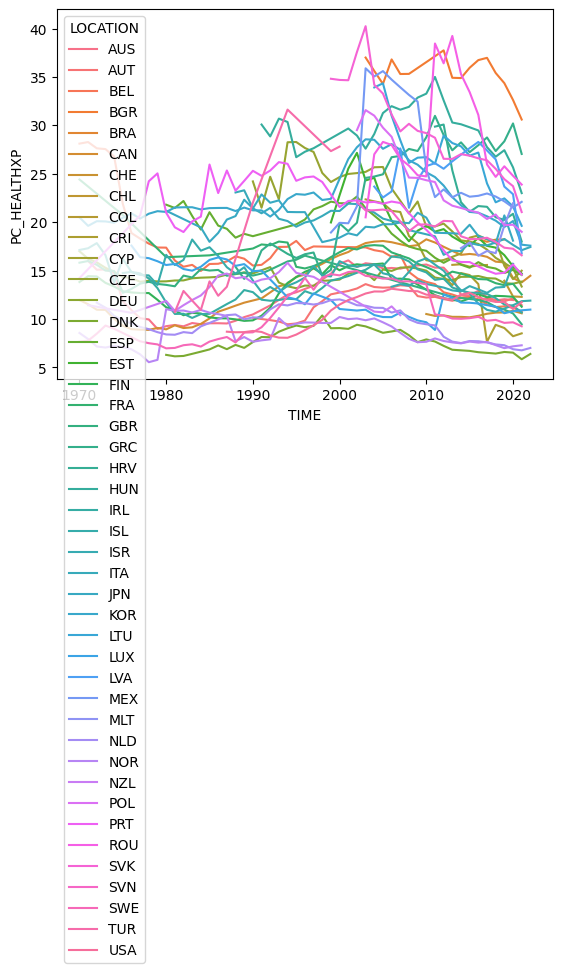

In [191]:
sns.lineplot(df, x="TIME", y="PC_HEALTHXP", hue="LOCATION")

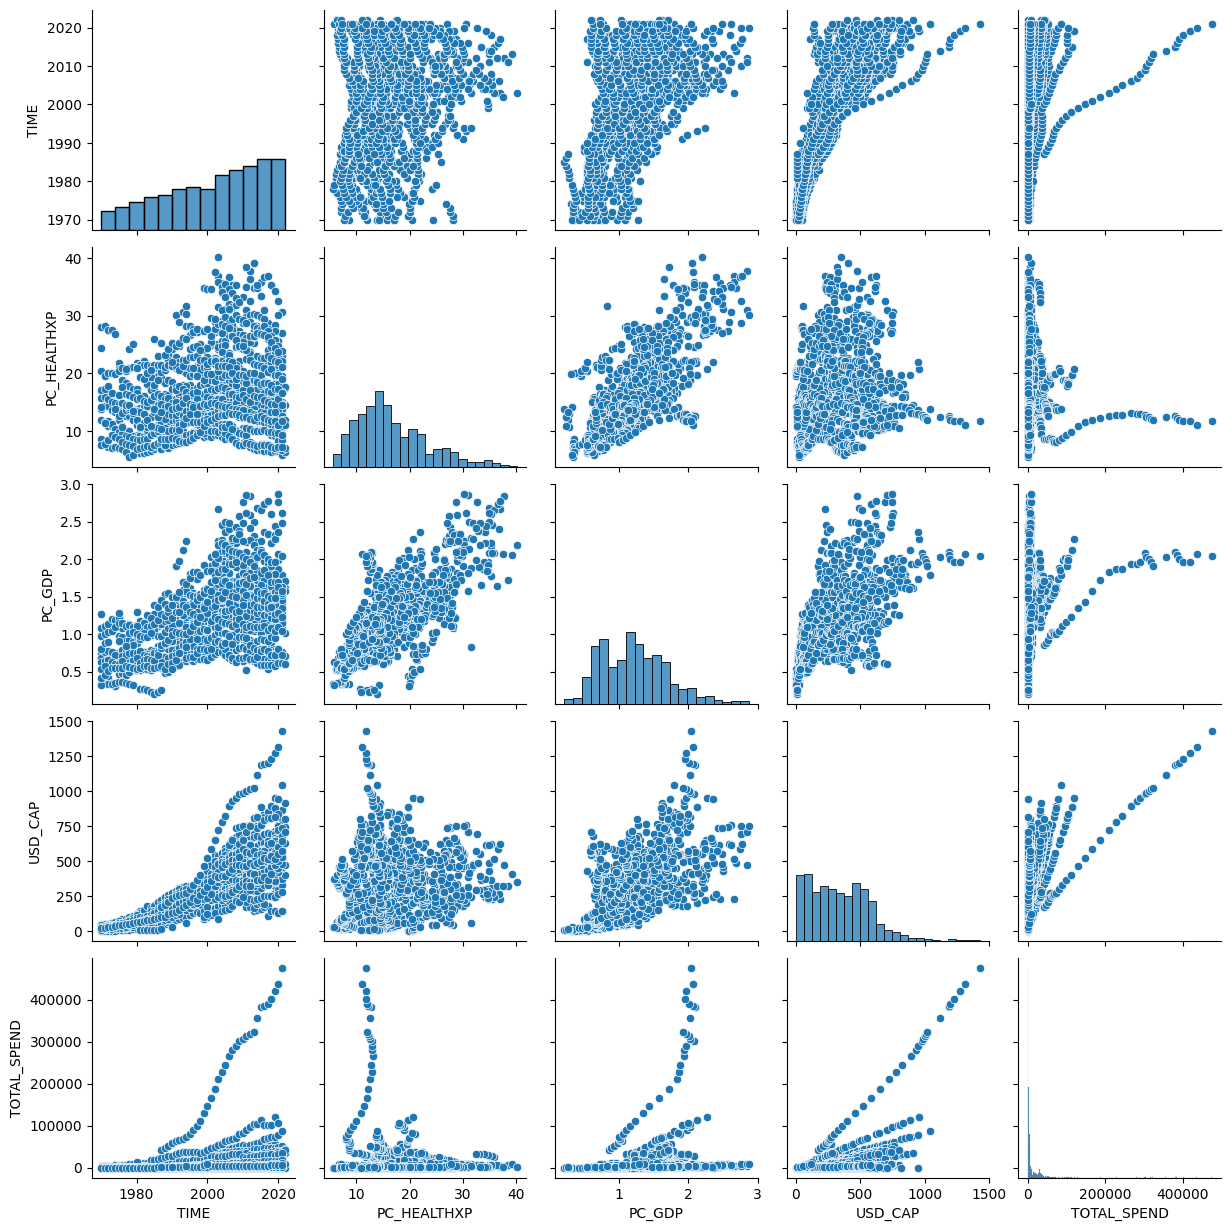

In [192]:
sns.pairplot(df)

In [193]:
oecd_df = pd.read_csv("oecd-data-2.csv", usecols=["REF_AREA", "Reference area", "MEASURE", "Measure", "FREQ", "TIME_PERIOD", "OBS_VALUE"])
# oecd_df = pd.read_csv("oecd-data.csv")

oecd_df = oecd_df[oecd_df["FREQ"] == "A"].drop(["FREQ"], axis=1)
oecd_df["TIME_PERIOD"] = oecd_df["TIME_PERIOD"].astype(int)

oecd_df.head()

,REF_AREA,Reference area,MEASURE,Measure,TIME_PERIOD,OBS_VALUE
0,BGR,Bulgaria,PCORE,Core inflation index,1997,0.388392
1,BGR,Bulgaria,PCORE,Core inflation index,1998,0.503750
2,BGR,Bulgaria,PCORE,Core inflation index,1999,0.546200
3,BGR,Bulgaria,PCORE,Core inflation index,2000,0.591033
4,BGR,Bulgaria,PCORE,Core inflation index,2001,0.652317


In [194]:
oecd_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12010 entries, 0 to 58902
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   REF_AREA        12010 non-null  object 
 1   Reference area  12010 non-null  object 
 2   MEASURE         12010 non-null  object 
 3   Measure         12010 non-null  object 
 4   TIME_PERIOD     12010 non-null  int32  
 5   OBS_VALUE       12010 non-null  float64
dtypes: float64(1), int32(1), object(4)
memory usage: 609.9+ KB


In [195]:
oecd_df.groupby(["REF_AREA", "TIME_PERIOD"])


In [196]:
def test(foo):
    print("==========")
    print(foo["Measure"])
    print("++++++++++++")
    print(foo["OBS_VALUE"])
    return (foo["Measure"], foo["OBS_VALUE"])

measurements = oecd_df["Measure"].unique()
print(measurements)

def get_obs_from_meas(meas):
    return lambda x: print(x["Measure"])

agg_dict = {}

for m in measurements:
    agg_dict[m] = get_obs_from_meas(m)

print(agg_dict)

def pivot_group(group):
    return group[["Measure", "OBS_VALUE"]]

oecd_grouped_df = oecd_df.groupby(["REF_AREA", "Reference area", "TIME_PERIOD"]).apply(pivot_group)

# for i, value in oecd_grouped_df:
#     print(i)
#     # print(value["MEASURE"])
#     # print(value["OBS_VALUE"])
#     # print("=========")

# # oecd_grouped_df.head()

# oecd_grouped_df.get_group(('ARG', '2000'))

['Core inflation index'
 'Purchasing power parity, national currency per USD' 'Unemployment rate'
 'Gross domestic product per capita, volume in USD, at constant purchasing power parities'
 'Gross domestic product per capita, volume' 'Core inflation'
 'Real net disposable income of households and non-profit institutions serving households']
{'Core inflation index': <function get_obs_from_meas.<locals>.<lambda> at 0x000001E4A7F83A60>, 'Purchasing power parity, national currency per USD': <function get_obs_from_meas.<locals>.<lambda> at 0x000001E4A7F83BA0>, 'Unemployment rate': <function get_obs_from_meas.<locals>.<lambda> at 0x000001E49D324B80>, 'Gross domestic product per capita, volume in USD, at constant purchasing power parities': <function get_obs_from_meas.<locals>.<lambda> at 0x000001E4843FF1A0>, 'Gross domestic product per capita, volume': <function get_obs_from_meas.<locals>.<lambda> at 0x000001E4FB55FA60>, 'Core inflation': <function get_obs_from_meas.<locals>.<lambda> at 0x00

C:\Users\emmaf\AppData\Local\Temp\ipykernel_2400\4292062305.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  oecd_grouped_df = oecd_df.groupby(["REF_AREA", "Reference area", "TIME_PERIOD"]).apply(pivot_group)


In [197]:
# oecd_grouped_df.loc["ARG", "2000", 24234]


oecd_pivot_df = oecd_df.pivot(index=["REF_AREA", "Reference area", "TIME_PERIOD"], columns="Measure", values="OBS_VALUE").reset_index()
oecd_pivot_df = oecd_pivot_df.set_index(["REF_AREA", "TIME_PERIOD"])
oecd_pivot_df

Measure              Reference area  Core inflation  Core inflation index  \
REF_AREA TIME_PERIOD                                                        
ARG      1993             Argentina             NaN                   NaN   
         1994             Argentina             NaN                   NaN   
         1995             Argentina             NaN                   NaN   
         1996             Argentina             NaN                   NaN   
         1997             Argentina             NaN                   NaN   
...                             ...             ...                   ...   
ZAF      2021          South Africa        3.119678              1.275422   
         2022          South Africa        4.556124              1.333531   
         2023          South Africa        5.397662              1.405511   
         2024          South Africa        5.036162              1.476295   
         2025          South Africa        4.564385              1.543679   

Measure               Gross domestic product per capita, volume  \
REF_AREA TIME_PERIOD                                              
ARG      1993                                               NaN   
         1994                                               NaN   
         1995                                               NaN   
         1996                                               NaN   
         1997                                               NaN   
...                                                         ...   
ZAF      2021                                      75261.405261   
         2022                                      75889.150996   
         2023                                      75803.147175   
         2024                                      75902.967759   
         2025                                      75992.172602   

Measure               Gross domestic product per capita, volume in USD, at constant purchasing power parities  \
REF_AREA TIME_PERIOD                                                                                            
ARG      1993                                                       NaN                                         
         1994                                                       NaN                                         
         1995                                                       NaN                                         
         1996                                                       NaN                                         
         1997                                                       NaN                                         
...                                                                 ...                                         
ZAF      2021                                              12919.834877                                         
         2022                                              13027.597564                                         
         2023                                              13012.833620                                         
         2024                                              13029.969435                                         
         2025                                              13045.282886                                         

Measure               Purchasing power parity, national currency per USD  \
REF_AREA TIME_PERIOD                                                       
ARG      1993                                                  0.731127    
         1994                                                  0.736237    
         1995                                                  0.743940    
         1996                                                  0.730181    
         1997                                                  0.714473    
...                                                                 ...    
ZAF      2021                                   

In [ ]:
joined_df = df.join(oecd_pivot_df, on=["LOCATION", "TIME"])
reference_area = joined_df["Reference area"]
joined_df = joined_df.drop(columns=["Reference area"])
joined_df.insert(loc=1, column="Country name", value=reference_area)
# joined_df.to_csv("pharmaceutical_data.csv")
joined_df

,LOCATION,Country name,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND,Core inflation,Core inflation index,"Gross domestic product per capita, volume","Gross domestic product per capita, volume in USD, at constant purchasing power parities","Purchasing power parity, national currency per USD",Real net disposable income of households and non-profit institutions serving households,Unemployment rate
0,AUS,Australia,1971,15.992,0.726,33.990,439.73,NaN,NaN,37050.986560,22070.289979,0.693976,2.807105e+11,1.889748
1,AUS,Australia,1972,15.091,0.685,34.184,450.44,NaN,NaN,37299.072106,22218.067959,0.713033,2.945958e+11,2.589617
2,AUS,Australia,1973,15.117,0.681,37.956,507.85,NaN,NaN,38339.195778,22837.642043,0.764901,3.199179e+11,2.294517
3,AUS,Australia,1974,14.771,0.754,45.338,622.17,NaN,NaN,38344.985800,22841.091005,0.824775,3.401448e+11,2.656920
4,AUS,Australia,1975,11.849,0.682,44.363,616.34,NaN,NaN,38909.988567,23177.648168,0.859857,3.494302e+11,4.878655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,USA,United States,2017,11.954,2.004,1200.769,390396.57,1.598655,1.000000,60001.537355,58390.130872,1.000000,1.413227e+13,4.356773
1337,USA,United States,2018,11.766,1.957,1229.266,401771.09,1.896833,1.018968,61418.077124,59768.627927,1.000000,1.463159e+13,3.896420
1338,USA,United States,2019,11.767,1.961,1277.032,419287.86,1.649054,1.035772,62605.969357,60924.618022,1.000000,1.507872e+13,3.669003
1339,USA,United States,2020,11.037,2.070,1315.218,436030.19,1.317858,1.049422,60989.911412,59351.961070,1.000000,1.613689e+13,8.055301


In [199]:
joined_df.isnull().sum()

LOCATION                                                                                     0
Country name                                                                                72
TIME                                                                                         0
PC_HEALTHXP                                                                                  0
PC_GDP                                                                                       0
USD_CAP                                                                                      0
TOTAL_SPEND                                                                                  0
Core inflation                                                                             796
Core inflation index                                                                       788
Gross domestic product per capita, volume                                                  134
Gross domestic product per capita, volume in USD, 

In [200]:
joined_df[(joined_df["Purchasing power parity, national currency per USD"].isnull() & joined_df["Gross domestic product per capita, volume in USD, at constant purchasing power parities"].isnull() == False)]

,LOCATION,Country name,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND,Core inflation,Core inflation index,"Gross domestic product per capita, volume","Gross domestic product per capita, volume in USD, at constant purchasing power parities","Purchasing power parity, national currency per USD",Real net disposable income of households and non-profit institutions serving households,Unemployment rate
0,AUS,Australia,1971,15.992,0.726,33.990,439.73,NaN,NaN,37050.986560,22070.289979,0.693976,2.807105e+11,1.889748
1,AUS,Australia,1972,15.091,0.685,34.184,450.44,NaN,NaN,37299.072106,22218.067959,0.713033,2.945958e+11,2.589617
2,AUS,Australia,1973,15.117,0.681,37.956,507.85,NaN,NaN,38339.195778,22837.642043,0.764901,3.199179e+11,2.294517
3,AUS,Australia,1974,14.771,0.754,45.338,622.17,NaN,NaN,38344.985800,22841.091005,0.824775,3.401448e+11,2.656920
4,AUS,Australia,1975,11.849,0.682,44.363,616.34,NaN,NaN,38909.988567,23177.648168,0.859857,3.494302e+11,4.878655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,USA,United States,2017,11.954,2.004,1200.769,390396.57,1.598655,1.000000,60001.537355,58390.130872,1.000000,1.413227e+13,4.356773
1337,USA,United States,2018,11.766,1.957,1229.266,401771.09,1.896833,1.018968,61418.077124,59768.627927,1.000000,1.463159e+13,3.896420
1338,USA,United States,2019,11.767,1.961,1277.032,419287.86,1.649054,1.035772,62605.969357,60924.618022,1.000000,1.507872e+13,3.669003
1339,USA,United States,2020,11.037,2.070,1315.218,436030.19,1.317858,1.049422,60989.911412,59351.961070,1.000000,1.613689e+13,8.055301
